<a href="https://colab.research.google.com/github/maglkp/kaggle/blob/master/5dwdriving4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu May 16 19:43:40 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    17W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import pandas as pd
import numpy as np
from PIL import Image
import base64
from io import BytesIO

import matplotlib.pyplot as plt
from keras.models import load_model

#!pip install imgaug

from imgaug import augmenters as iaa
from imgaug import parameters as imp
import random

%matplotlib inline

In [5]:
X = np.load('X.npy')
y = np.load('y.npy')
X.shape, y.shape

((3216, 60, 80, 3), (3216,))

In [0]:
plt.hist(y, 50);

0.0


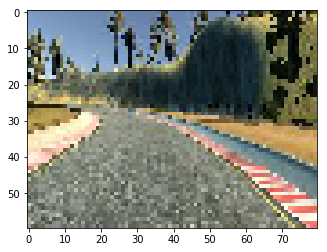

AttributeError: ignored

In [21]:
def augment(img, steering_angle):
  if random.random() > .5:
    img = img[:, ::-1, :]
    steering_angle = -steering_angle
  
  blurer = iaa.GaussianBlur(imp.Uniform(.1, 1));
  img = blurer.augment_image(img);
  
  sh = iaa.ChannelShuffle(p=.5)
  img = sh.augment_image(img)
  
  fog = iaa.fogFastSnowyLandscape()
  img = fog.augment_image(img)
  
  return img, steering_angle


plt.imshow(X[0])

print(y[0]);
plt.show();

img, angle = augment(X[0], y[0])
plt.imshow(img);
print(angle);
plt.show();

''